In [1]:
using CSV
using Plots
using DataFrames
using StatsPlots, KernelDensity
using PyCall

theme(:dracula)

In [2]:
surp = pyimport("surp")

PyObject <module 'surp' from '/users/PAS2232/aeyobd/python/surp/__init__.py'>

In [3]:
subgiants = surp.src.analysis.apogee_analysis.subgiants

function pd_to_df(df_pd)
    df= DataFrame()
    for col in df_pd.columns
        df[!, col] = getproperty(df_pd, col).values
    end
    df
end

sg = pd_to_df(subgiants);

In [4]:
mg_h_err(mg_h) = max(0.015,-0.03*mg_h + 0.025) * randn()

c_mg_err(mg_h) = max(0.02, -0.11*mg_h + 0.04) * randn()

mg_fe_err(mg_h) = max(0.01, -0.0225*mg_h+0.02) * randn()

mg_fe_err (generic function with 1 method)

In [16]:
df = CSV.read("../../results/C11_f0.2_eta1_beta0.001_lateburst1.5.csv", DataFrame);
mg_h = df[:, "MG_H"]

df[:, "MG_H"] .+= mg_h_err.(mg_h)
df[:, "MG_FE"] .+= mg_fe_err.(mg_h)
df[:, "C_MG"] .+= c_mg_err.(mg_h);

In [35]:
theme(:dracula, background_color="black")

[ Info: Saved animation to /users/PAS2232/aeyobd/python/surp/notebooks/vice model analysis/tmp.gif


Plots.AnimatedGif("/users/PAS2232/aeyobd/python/surp/notebooks/vice model analysis/tmp.gif")
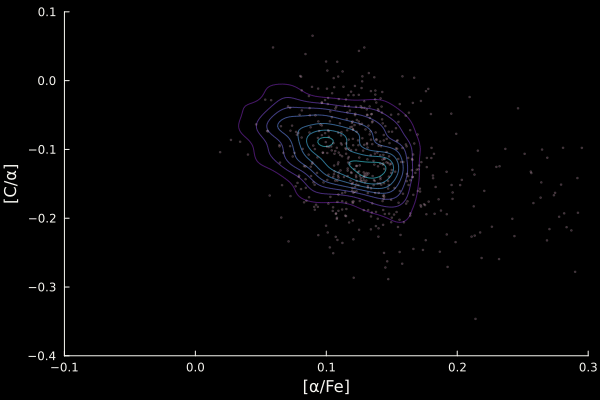

In [38]:
dz = 0.05

anim = @animate for mg_h in -0.2:0.01:0.5
    
    filt = @. mg_h <= sg[:,"MG_H"] < mg_h + dz
    filt .&= (sg[:,"high_alpha"] .!= 1)
    filt .&= isfinite.(sg[:,"C_MG"])
    dens = kde((sg[filt, "MG_FE"], sg[filt, "C_MG"]))
    plot(dens, clim=(0, 200), legend=false,
        background_color="black",
        background_color_subplot="black",
        background_color_inside="black"
        
    )
    
    filt = @. mg_h-dz < df[:,"MG_H"] < mg_h + dz
    if sum(filt) > 1
        scatter!(df[filt, "MG_FE"], df[filt, "C_MG"], ms=1, alpha=0.2,
            background_color_subplot="black",
            grid=:none
        )
    end

    
    
    xlims!(-0.1, 0.3)
    ylims!(-0.4, 0.1)
    xlabel!("[α/Fe]")
    ylabel!("[C/α]")
end

gif(anim, fps=10)

In [39]:
df

Row,Column1,MG_H,MG_FE,C_MG,N_MG,C_N
,Int64,Float64,Float64,Float64,Float64,Float64
1,419718,0.00346491,0.121717,-0.152519,-0.0448422,-0.0930905
2,264499,0.248808,0.0560939,-0.0576186,0.0536646,-0.11635
3,273312,0.192472,0.126933,-0.0801877,0.014578,-0.0884806
4,459326,0.051978,0.160835,-0.148667,-0.0648945,-0.0654262
5,253333,0.115574,0.137375,-0.0852799,-0.0401614,-0.058421
6,230518,0.133376,0.0958506,-0.0927848,-0.0295872,-0.0499019
7,346524,0.11707,0.0804704,-0.117683,0.00317005,-0.0998573
8,434968,-0.0650527,0.151889,-0.172087,-0.12476,-0.0143882
9,203358,-0.0375817,0.169652,-0.132939,-0.127789,0.0310379
